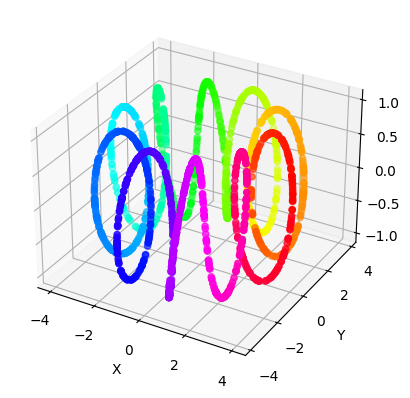

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def generate_toroidal_helix_points(n_points, c, a, n_turns):

    angles = np.sort(np.random.rand(n_points) * 2 * np.pi * n_turns)

    x = (c + a * np.cos(angles)) * np.cos(angles / n_turns)
    y = (c + a * np.cos(angles)) * np.sin(angles / n_turns)
    z = a * np.sin(angles)
    return np.vstack((x, y, z)).T, angles


n_points = 2000
c = 3
a = 1
n_turns = 10

points, angles = generate_toroidal_helix_points(n_points, c, a, n_turns)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=angles, cmap='hsv')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.savefig('helix')
plt.show()


In [ ]:
vals[1]


(0.997426441378771+0j)

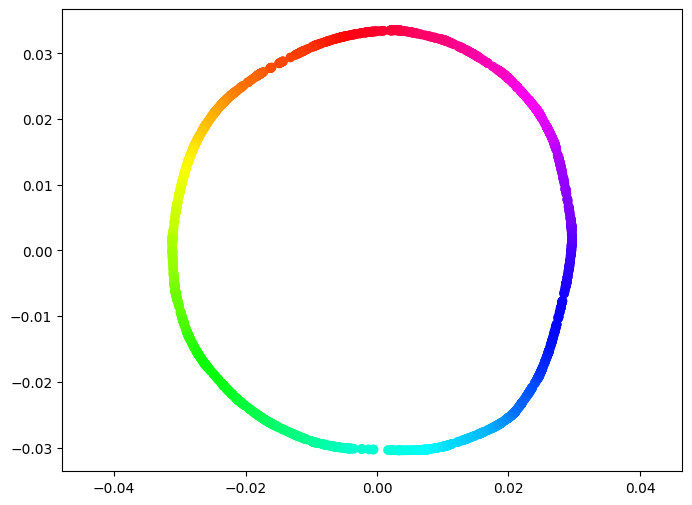

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.linalg import eigs



distances = np.linalg.norm(points[:, np.newaxis, :] - points[np.newaxis, :, :], axis=2)
epsilon = 0.07
Weightmatrix = np.exp(-distances**2 / (2.0 * epsilon))


degree_matrix = np.diag(Weightmatrix.sum(axis=1))



laplacian_matrix = np.eye(degree_matrix.shape[0]) - np.linalg.inv(degree_matrix).dot(Weightmatrix)


vals, vecs = eigs(laplacian_matrix, k=10, which='SR')


sorted_indices = np.argsort(np.real(vals))
vals = vals[sorted_indices]
vecs = vecs[:, sorted_indices]


embedding = vecs[:, 1:3]
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=angles, cmap='hsv')
plt.axis('equal')
plt.savefig('helix_diffusionmap_laplacian')
plt.show()

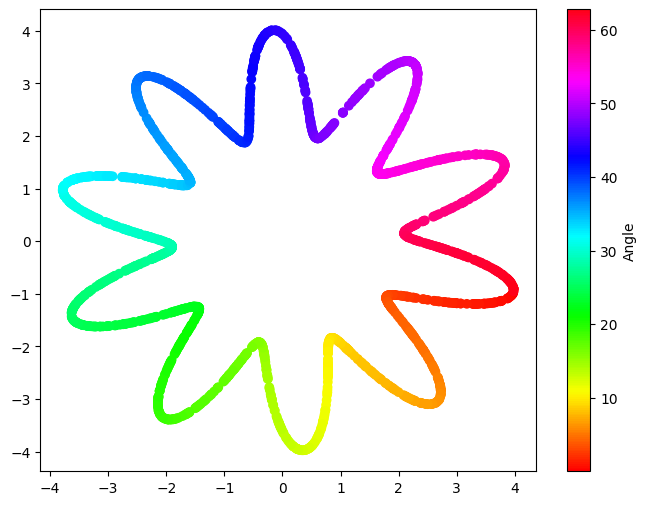

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


points, angles = generate_toroidal_helix_points(n_points, c, a, n_turns)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(points)


plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=angles, cmap='hsv')
plt.colorbar(label='Angle')
plt.savefig('helix_PCA')
plt.show()